In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.impute import SimpleImputer
%matplotlib inline 
sns.set()

In [3]:
Order = pd.read_csv('Training_Dataset_v2.csv',low_memory=False)

In [4]:
Order.shape

(1687861, 23)

In [80]:
Order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1687860 entries, 0 to 1687859
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687860 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1687860 non-null  int32  
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  int64  
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

In [6]:
Order.isna().sum()

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [83]:
Order.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,1,1,1,0,1,1
1,1043384,2.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,1,1,1,0,1,1
2,1043696,2.0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,0,1,1,0,1,1
3,1043852,7.0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,1,1,1,0,1,1
4,1044048,8.0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,0,1,1,0,1,1


In [7]:
Order["went_on_backorder"].unique()

array(['No', 'Yes', nan], dtype=object)

In [8]:
Order.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [9]:
Order.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


In [10]:
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
Order["lead_time"]=imputer.fit_transform(Order[["lead_time"]])

In [11]:
# deleting entire row for all null values(based on index axis=0)
Order = Order.dropna() 

In [12]:
Order["lead_time"]=Order["lead_time"].astype('int')

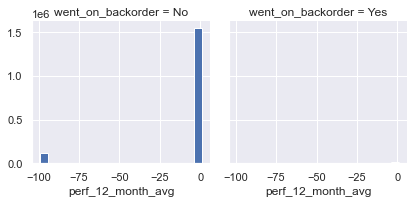

In [13]:
g = sns.FacetGrid(Order, col='went_on_backorder')
g.map(plt.hist, 'perf_12_month_avg', bins=20)

In [14]:
catg_fea =["potential_issue","deck_risk","oe_constraint","ppap_risk","stop_auto_buy","rev_stop","went_on_backorder"]

In [15]:
for col in catg_fea:
    print(Order[col].unique())

['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']


In [16]:
#encoding categorical values
for col in catg_fea:
    Order[col] = Order[col].map({"Yes" : 0, "No" : 1})

In [17]:
X = Order.drop(["went_on_backorder","sku"],axis=1)

In [18]:
y = Order["went_on_backorder"]

In [81]:
y.value_counts()

1    0.993309
0    0.006691
Name: went_on_backorder, dtype: float64

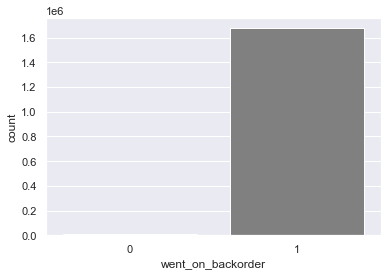

In [20]:
sns.countplot(y, color='gray')

In [21]:
# Filtering duplicate rows in given varaible
duplicate = Order[Order.duplicated()]

In [22]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = pd.DataFrame(scalar.fit_transform(X),columns=X.columns)

X_scaled

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
0,-0.016752,-0.119814,-0.032808,-0.035436,-0.035220,-0.035216,-0.029004,-0.033708,-0.035548,-0.035399,...,0.023187,-0.008659,-3.469149,-3.581662,-0.018577,0.545873,0.012049,0.37061,-0.193779,0.020815
1,-0.016684,0.172370,-0.032808,-0.035436,-0.035220,-0.035216,-0.029004,-0.033708,-0.035548,-0.035399,...,0.023187,-0.008659,0.296052,0.287422,-0.018577,0.545873,0.012049,0.37061,-0.193779,0.020815
2,-0.016684,-0.119814,-0.032808,-0.035436,-0.035220,-0.035216,-0.029004,-0.033708,-0.035548,-0.035399,...,0.023187,-0.008659,-3.469149,-3.581662,-0.018577,-1.831928,0.012049,0.37061,-0.193779,0.020815
3,-0.016516,0.026278,-0.032808,-0.035436,-0.035220,-0.035216,-0.029004,-0.033708,-0.035548,-0.035399,...,0.023187,-0.008659,0.262538,0.254145,-0.018577,0.545873,0.012049,0.37061,-0.193779,0.020815
4,-0.016482,-0.119814,-0.032808,-0.035436,-0.035220,-0.035216,-0.029004,-0.033708,-0.035548,-0.035129,...,0.023187,-0.008659,-3.469149,-3.581662,-0.018577,-1.831928,0.012049,0.37061,-0.193779,0.020815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687855,-0.016752,-0.850273,-0.032808,-0.033446,-0.034199,-0.034520,-0.029004,-0.032745,-0.034820,-0.034927,...,0.023187,-0.008659,0.284755,0.275814,0.129693,-1.831928,0.012049,0.37061,-0.193779,0.020815
1687856,-0.016786,-0.119814,-0.032808,-0.034441,-0.034506,-0.034590,-0.028486,-0.033130,-0.035236,-0.034860,...,0.023187,-0.008659,-3.469149,-3.581662,0.011077,0.545873,0.012049,0.37061,-0.193779,0.020815
1687857,-0.016786,0.172370,-0.032808,-0.034043,-0.034301,-0.034451,-0.029004,-0.032168,-0.034404,-0.034590,...,0.023187,-0.008659,0.291157,0.281618,0.011077,-1.831928,0.012049,0.37061,5.160512,0.020815
1687858,-0.014658,0.172370,-0.020892,-0.027677,-0.026338,-0.026453,-0.010853,-0.021575,-0.019632,-0.021584,...,0.023187,-0.008659,0.291157,0.281618,0.159347,0.545873,0.012049,0.37061,-0.193779,0.020815


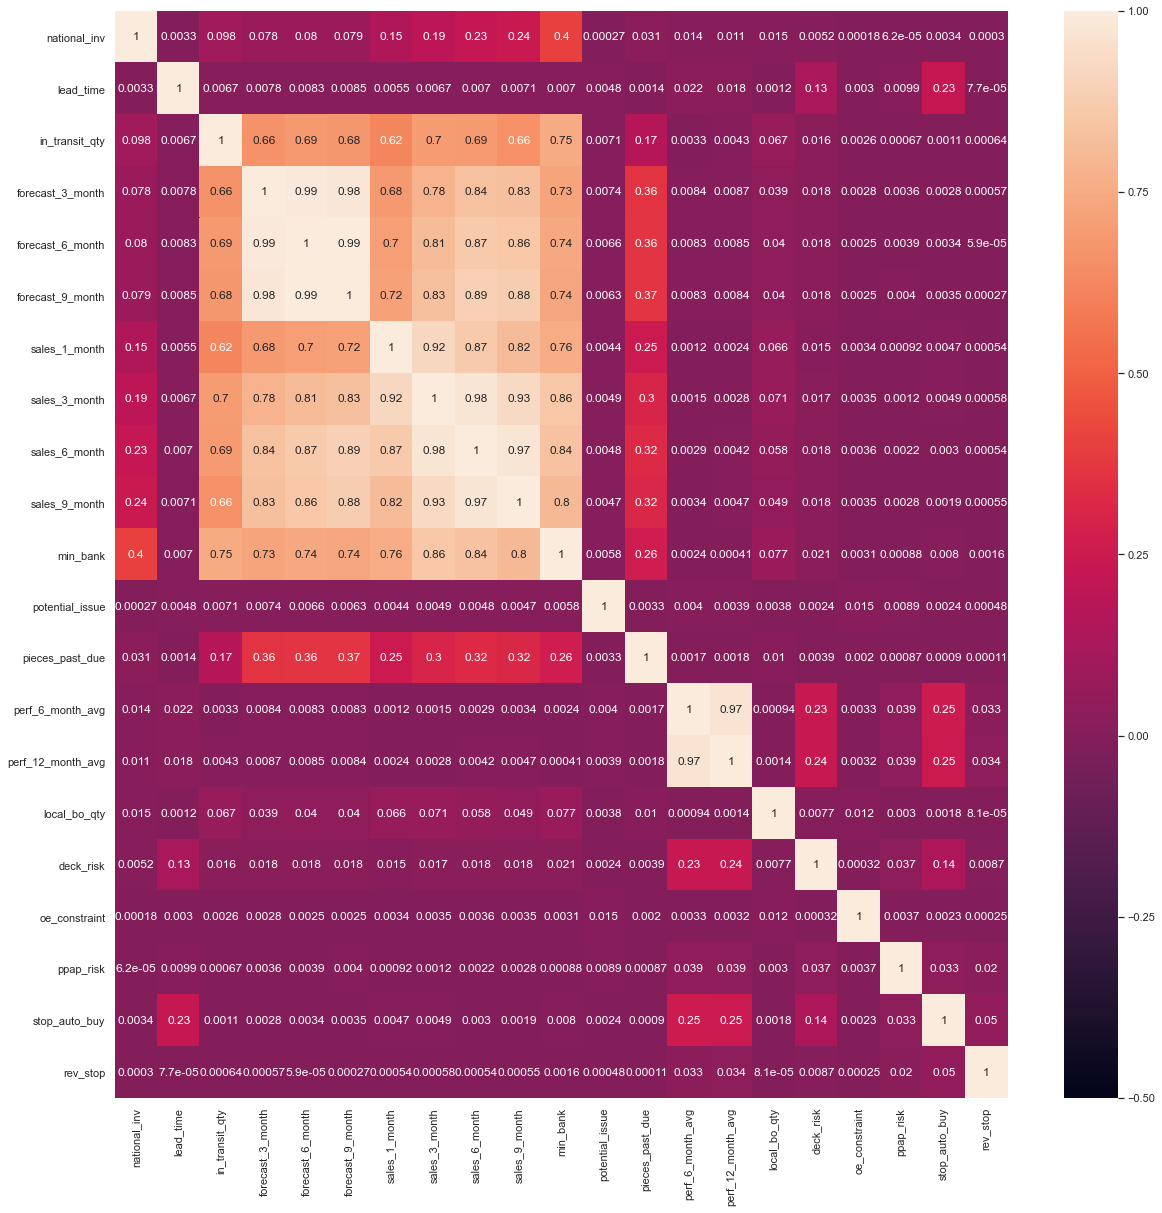

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(X_scaled.corr().abs(), vmin = -0.5,vmax = 1,annot=True)

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled.values

In [26]:
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [27]:
vif

,VIF,Features
0,1.874065,national_inv
1,1.071774,lead_time
2,3.011279,in_transit_qty
3,91.635351,forecast_3_month
4,473.297648,forecast_6_month
5,267.047217,forecast_9_month
6,7.622890,sales_1_month
7,61.731909,sales_3_month
8,97.995634,sales_6_month
9,20.745207,sales_9_month


In [28]:
vif[vif["VIF"]>8].count()

VIF         8
Features    8
dtype: int64

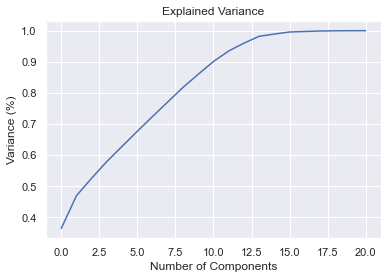

In [29]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [30]:
pca = PCA(n_components=10) # components takes based on above graph
new_data = pca.fit_transform(X_scaled)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10'])

In [31]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10
0,-0.119250,4.184266,2.138894,-0.101331,-0.302499,0.182959,0.276597,-0.144675,-0.418150,-0.000304
1,-0.100656,-0.593881,-0.014940,0.013942,-0.173200,0.067069,0.170901,-0.109097,-0.283441,0.002469
2,-0.138855,4.883071,1.534566,-0.184784,-0.395278,0.555724,-0.043175,-0.050856,-0.131934,-0.018987
3,-0.100069,-0.568237,0.111453,0.009433,-0.165584,0.056702,0.168907,-0.107127,-0.277690,0.002051
4,-0.138240,4.883088,1.534580,-0.184170,-0.395307,0.555693,-0.043260,-0.050903,-0.131950,-0.018931
...,...,...,...,...,...,...,...,...,...,...
1687855,-0.111163,0.003916,0.154142,-0.071169,-0.163620,0.401317,-0.064770,0.076851,0.074670,0.004353
1687856,-0.117066,4.184216,2.139164,-0.096325,-0.294433,0.191364,0.297443,-0.129517,-0.413568,0.004339
1687857,-0.116019,1.808254,-3.224232,0.035661,-0.148068,0.151380,0.320344,-0.145306,-0.503949,-0.067208
1687858,-0.060969,-0.587155,-0.010578,0.049169,-0.125176,0.117564,0.295895,-0.018150,-0.256036,0.025145


In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = principal_x.values

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = principal_x.columns

In [33]:
vif

,VIF,Features
0,1.0,PC-1
1,1.0,PC-2
2,1.0,PC-3
3,1.0,PC-4
4,1.0,PC-5
5,1.0,PC-6
6,1.0,PC-7
7,1.0,PC-8
8,1.0,PC-9
9,1.0,PC-10


### Target feature is imbalaced

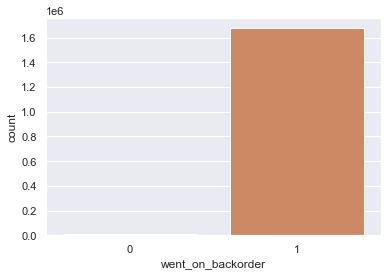

In [34]:
sns.countplot(y)

In [35]:
# separate the minority and majority classes
df_maj = Order[Order['went_on_backorder']==1]
df_min = Order[Order['went_on_backorder']==0]

In [36]:
# undersample majority class
from sklearn.utils import resample

df_maj_undersample = resample(df_maj, replace=True, n_samples=11293, random_state=0)

In [37]:
# combine majority class with oversampled minority class

df_undersampled = pd.concat([df_min, df_maj_undersample])

In [38]:
# display new class value counts

df_undersampled['went_on_backorder'].value_counts()

1    11293
0    11293
Name: went_on_backorder, dtype: int64

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [40]:
# declare feature vector and target variable
X2 = df_undersampled.drop(['went_on_backorder'], axis=1)
y2 = df_undersampled['went_on_backorder']


# instantiate the Logistic Regression classifier
logreg2 = LogisticRegression()


# fit the classifier to the imbalanced data
clf2 = logreg2.fit(X2, y2)


# predict on the training data
y2_pred = clf2.predict(X2)


# print the accuracy
accuracy2 = accuracy_score(y2_pred, y2)

print("Accuracy : %.2f%%" % (accuracy2 * 100.0))

Accuracy : 65.27%


In [41]:
# Random under-sampling and over-sampling with imbalanced-learn
#but here we use Random oversampling because random under sampling got tarin 99 test 86 accuracy and precision -recall 
#score is 0.76


#import imbalanced learn library
import imblearn

In [42]:
# import RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

# instantiate the RandomUnderSampler
rus = RandomUnderSampler(random_state=42)


# fit the RandomUnderSampler to the dataset
X_rus, y_rus = rus.fit_sample(principal_x, y)

In [43]:
X_rus

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10
0,-0.102187,-0.409547,-0.135364,0.016583,1.168533,-1.088567,-0.880507,0.633001,1.837344,0.039812
1,0.336451,-0.430581,-0.147598,-0.226346,1.177250,-1.080372,-0.855884,0.646418,1.841120,0.038238
2,0.023364,4.197963,2.044652,0.182449,0.139973,0.664686,1.445703,0.701007,-0.169042,0.262082
3,-0.070289,-0.608164,0.095315,0.013233,-0.164541,0.055342,0.167637,-0.106857,-0.276418,-0.002097
4,1.564716,-0.548624,-0.194195,2.688452,4.035190,4.514417,11.127174,7.847356,2.103028,2.340862
...,...,...,...,...,...,...,...,...,...,...
22581,-0.117834,4.184288,2.138905,-0.100701,-0.302541,0.182921,0.276494,-0.144734,-0.418167,-0.000304
22582,-0.121669,0.165851,-0.942994,-0.058054,-0.293092,0.474869,-0.139834,-0.022424,-0.018770,-0.014896
22583,-0.119306,0.221008,-0.302842,-0.082664,1.111503,-0.762143,-1.212034,0.736228,2.151885,0.019344
22584,-0.118724,4.184280,2.138902,-0.100862,-0.302536,0.182931,0.276510,-0.144729,-0.418166,-0.000235


In [44]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

X_ros, y_ros = ros.fit_sample(principal_x, y)

In [45]:
print(X_ros.shape[0] - X.shape[0], 'new random points generated')

1665274 new random points generated


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_test, y_train,y_test = train_test_split(X_ros,y_ros,test_size = 0.3)

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf = RandomForestClassifier(oob_score=True)

In [50]:
lr = LogisticRegression()

In [51]:
rf.fit(x_train,y_train)

RandomForestClassifier(oob_score=True)

In [52]:
rf.feature_importances_

array([0.16223098, 0.06630522, 0.06809995, 0.14509175, 0.07381371,
       0.07857367, 0.10837811, 0.08728523, 0.06505319, 0.14516819])

In [53]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': True, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [54]:
rf.score(x_train,y_train)

0.9961549817164588

In [55]:
rf.score(x_test,y_test)

0.995706507638122

In [56]:
print(rf.oob_score_)

0.9954771507924572


In [57]:
pred = rf.predict(x_test)

In [58]:
(pred - y_test).unique()

array([ 0, -1,  1], dtype=int64)

In [59]:
pd.DataFrame(principal_x.columns,(rf.feature_importances_))

,0
0.162231,PC-1
0.066305,PC-2
0.068100,PC-3
0.145092,PC-4
0.073814,PC-5
0.078574,PC-6
0.108378,PC-7
0.087285,PC-8
0.065053,PC-9
0.145168,PC-10


In [60]:
lr.fit(x_train,y_train)

LogisticRegression()

In [61]:
lr.score(x_test,y_test)

0.6124812489002834

In [62]:

# import the metric
from sklearn.metrics import confusion_matrix


# print the confusion matrix
cnf_matrix = confusion_matrix(y_test,pred)


print('Confusion matrix:\n', cnf_matrix)

Confusion matrix:
 [[501076   2047]
 [  2272 500546]]


In [63]:
# import the metric
from sklearn.metrics import classification_report # it gives 0 to 1


# print classification report
print("Classification Report:\n\n", classification_report(y_test, pred))

Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    503123
           1       1.00      1.00      1.00    502818

    accuracy                           1.00   1005941
   macro avg       1.00      1.00      1.00   1005941
weighted avg       1.00      1.00      1.00   1005941



In [64]:
# compute and print average precision score

from sklearn.metrics import average_precision_score

average_precision = average_precision_score(pred, y_test)

print('Average precision-recall score : {0:0.2f}'.format(average_precision))

Average precision-recall score : 0.99


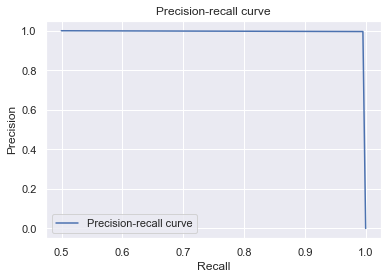

In [65]:

from sklearn.metrics import precision_recall_curve 

precision, recall, thresholds = precision_recall_curve(pred, y_test)

# create plot
plt.plot(precision, recall, label='Precision-recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.legend(loc="lower left")

## ROC analysis

In [66]:
from pandas import DataFrame, Series
prob_score = rf.predict_proba(x_test)
prob_score = DataFrame(prob_score).iloc[:,0]

In [67]:
from sklearn.metrics import classification_report, roc_curve, auc
fpr,tpr,thresholds = roc_curve(y_test,1-prob_score)
#auc = auc(fpr,tpr)

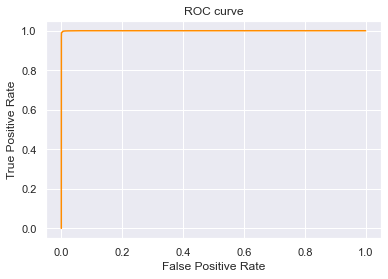

In [69]:
#Plotting the ROC curve
plt.plot(fpr,tpr, color = 'darkorange')
plt.xlim([-.05, 1.05])
plt.ylim([-.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [70]:
tpr

array([0.        , 0.86252282, 0.86253078, ..., 0.99991448, 0.99991846,
       1.        ])

In [71]:
fpr

array([0.        , 0.        , 0.        , ..., 0.06235255, 0.0627282 ,
       1.        ])

In [72]:
thresholds

array([2.        , 1.        , 0.99881745, ..., 0.00253886, 0.00245721,
       0.        ])

In [73]:
#ROC Analysis
i = np.arange(len(fpr))
roc = DataFrame({'fpr' : Series(fpr, index=i),'tpr' : Series(tpr, index = i), '1-fpr' : Series(1-fpr, index = i), 
                    'tf' : Series(tpr - (1-fpr), index = i), 'thresholds' : Series(thresholds, index = i)})
roc.loc[(roc['tf']-0).abs().argsort()[[0]]]

,fpr,tpr,1-fpr,tf,thresholds
892,0.004182,0.995802,0.995818,-0.000016,0.47


[Text(0, 0, 'tpr'), Text(0, 0, '1-fpr')]

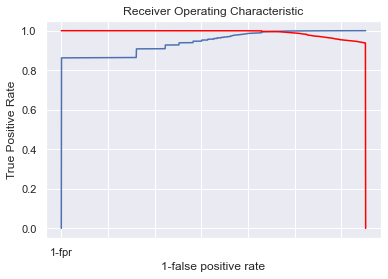

In [79]:
fig, ax = plt.subplots(1)
plt.plot(roc['tpr'])
plt.plot(roc['1-fpr'], color = 'red')
plt.xlabel('1-false positive rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
ax.set_xticklabels(['tpr','1-fpr'])